# TIF Model

Technical Indicators + Fundamentals Model. By providing fundaments to the feature set, we provide additional context about the broader scope of the asset. Feature importance analysis has shown the TIRF model to assign higher importance to long-term features, so providing fundamentals may satiate this need.

In [9]:
# Auto reload local files
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
# Make files in src/ available to notebook
import sys
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

from signals import SignalSet
from technical_signals import TechnicalSignalSet, percent_change
from financials_reported_signals import FinancialsReportedSignalSet
import datastore as ds
import backtest as bt
from strategy import TechnicalIndicatorsModelStrategy, DummyStrategy, SignalModelStrategy

# XXX NOTE VERY IMPORTANT
# THIS FILTERS ALL WARNINGS - ta library is giving annoying warnings.
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


========== TESTING MODEL: SVR ===========


Ticker: WM
Error downloading daily candlesticks for WM:
HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/WM/history?period1=946728000&period2=1686135599&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f3e08face50>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
91 buy/sells performed - 1.600422089342244% of the time
Stock price change: 91.677032019731%
Total gain/loss: 37.431395263671874%
ROI: 37.2349807967849%
{'cash': -52.74998474121094, 'assets': 89, 'latest_price': 155.00999450683594, 'total_value': 13743.139526367188, 'roi': 0.37234980796784906}


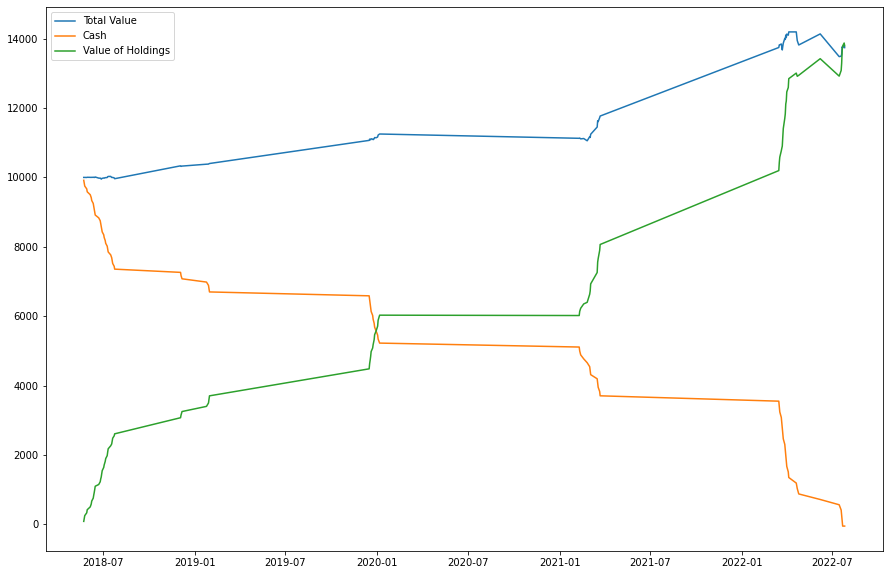

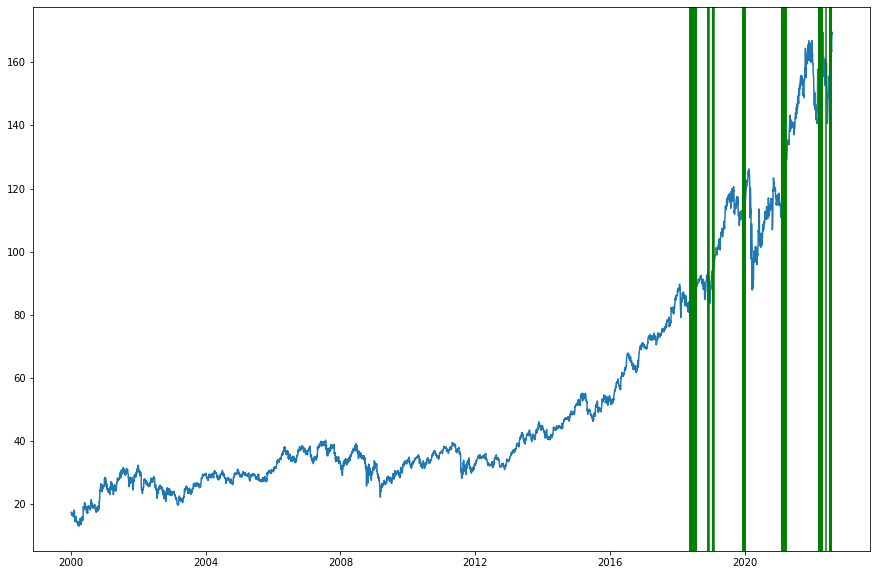

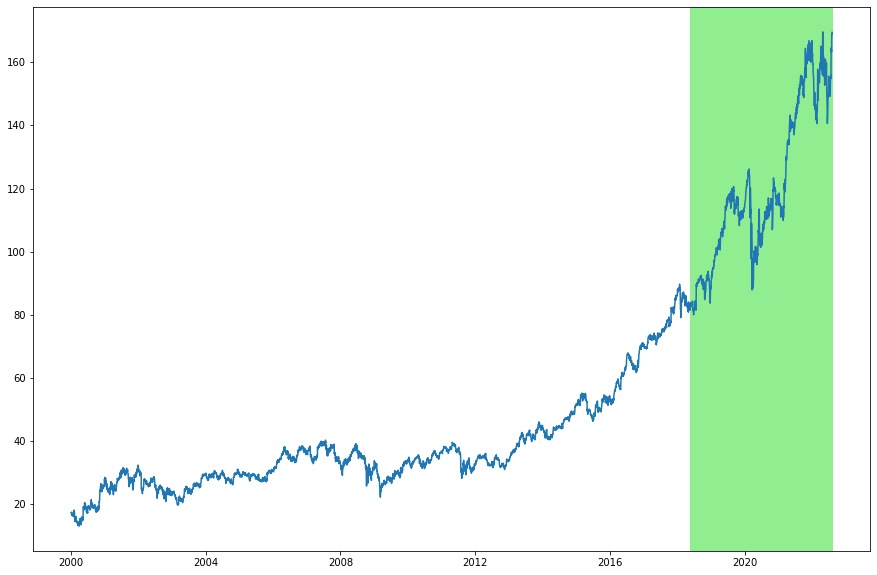

Ticker: MAS
2 buy/sells performed - 0.03511852502194908% of the time
Stock price change: 28.432287662152284%
Total gain/loss: 0.21629997253417968%
ROI: 28.197102739629976%
{'cash': 9923.290000915527, 'assets': 2, 'latest_price': 49.16999816894531, 'total_value': 10021.629997253418, 'roi': 0.28197102739629976}


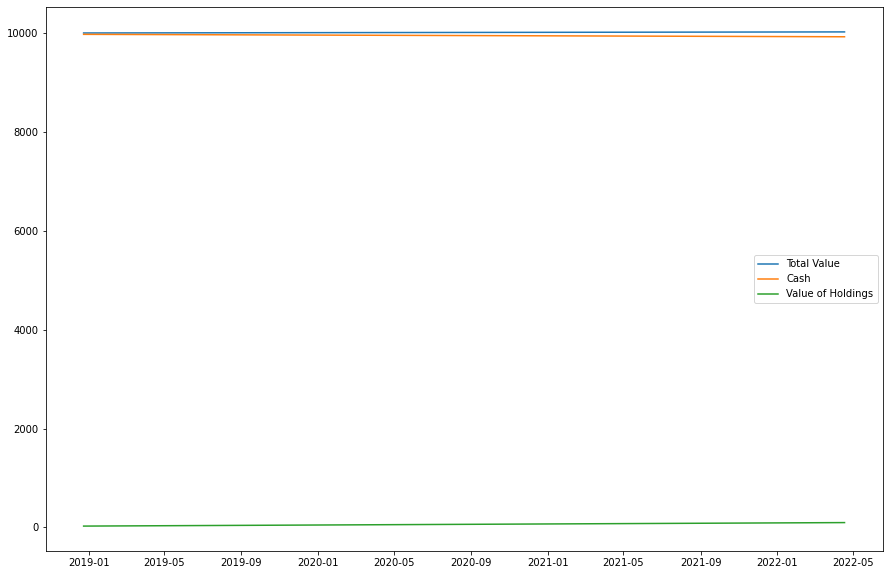

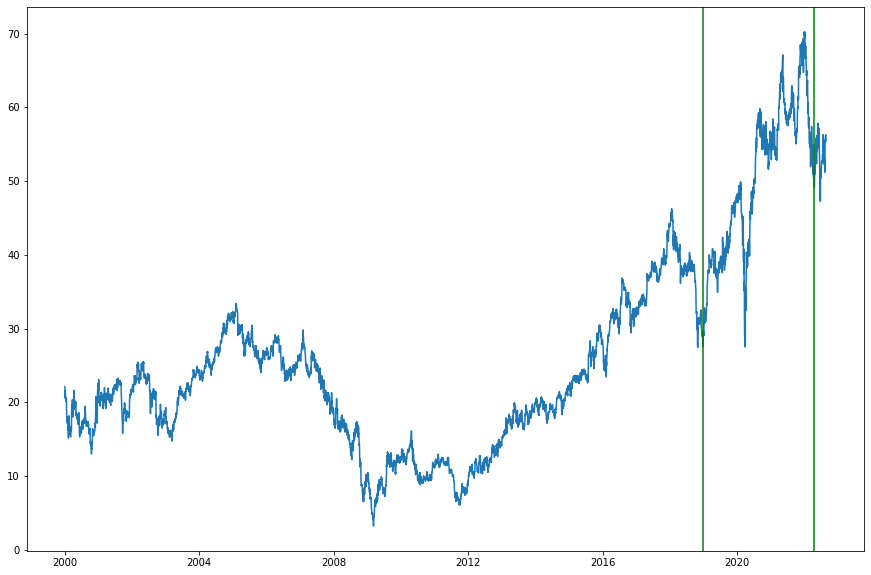

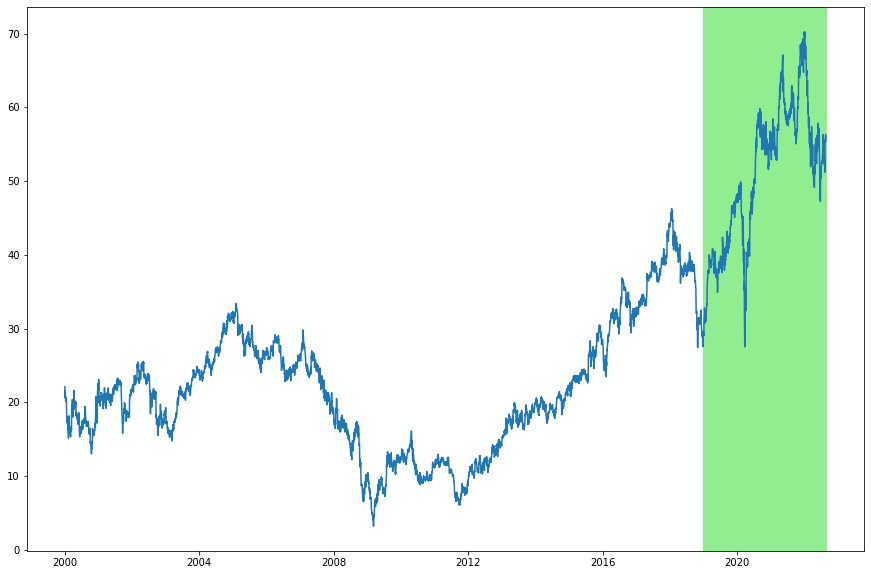

Ticker: UAA
Error downloading daily candlesticks for UAA:
HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/UAA/history?period1=946728000&period2=1686135599&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f3e094f9ff0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
198 buy/sells performed - 4.703087885985748% of the time
Stock price change: -54.02621997086828%
Total gain/loss: -3.239947323799133%
ROI: -14.490802250459273%
{'cash': 8185.6052985191345, 'assets': 162, 'latest_price': 9.199999809265137, 'total_value': 9676.005267620087, 'roi': -0.14490802250459273}


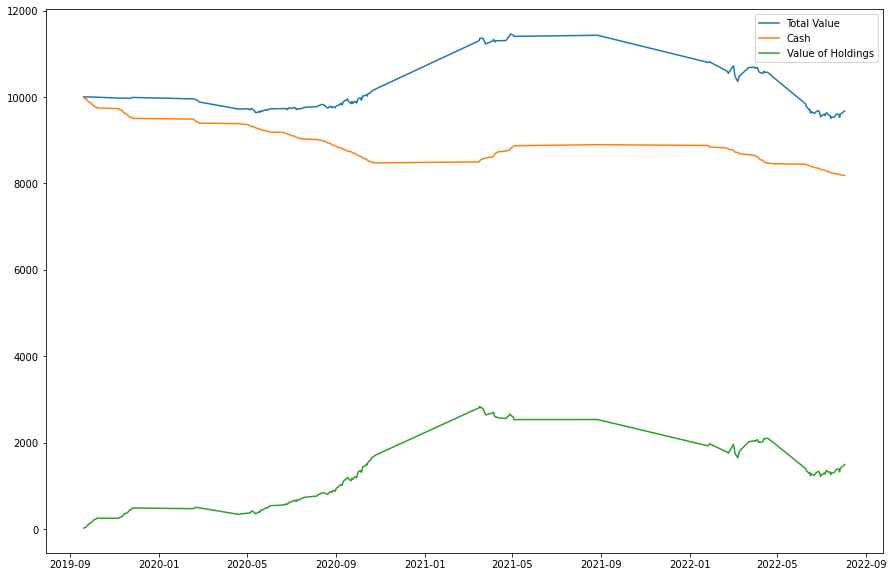

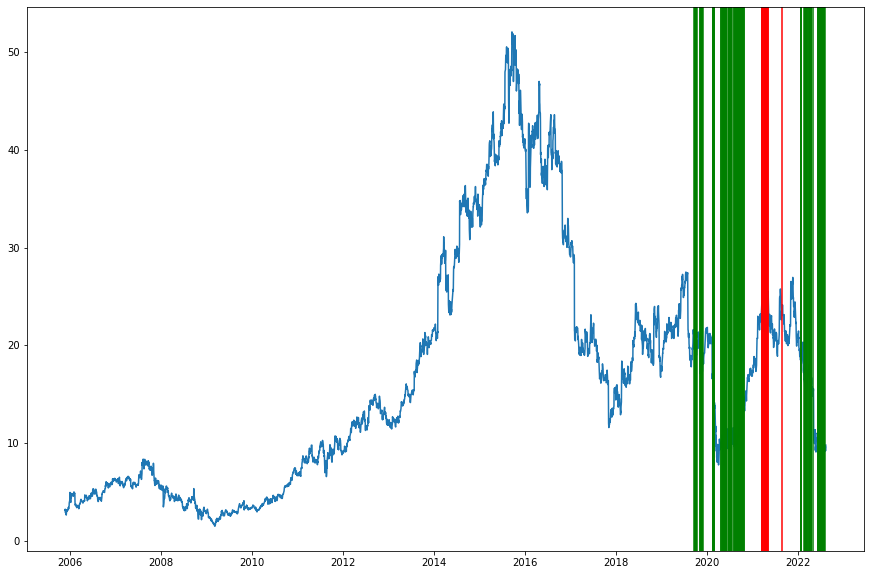

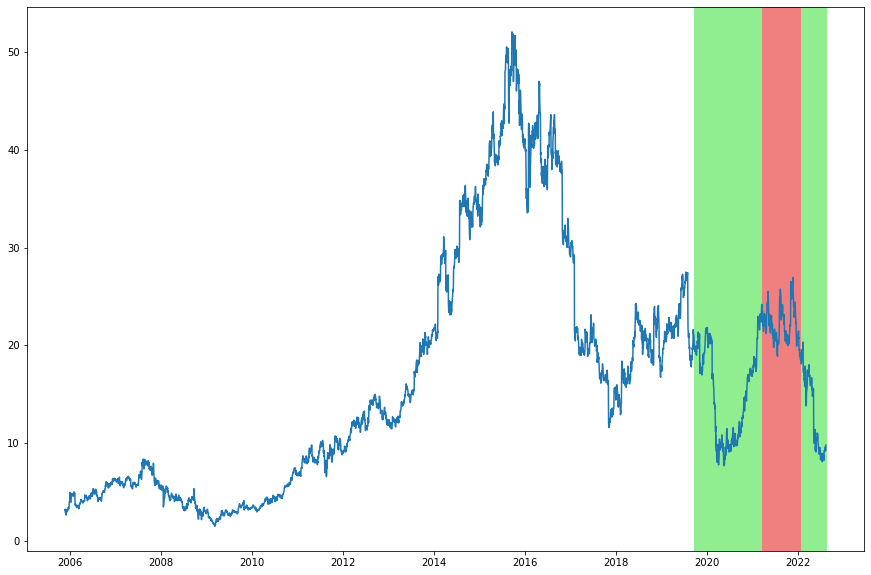

{'average_gainloss': 1146.924930413564, 'results': {'WM': {'cash': -52.74998474121094, 'assets': 89, 'latest_price': 155.00999450683594, 'total_value': 13743.139526367188, 'roi': 0.37234980796784906}, 'MAS': {'cash': 9923.290000915527, 'assets': 2, 'latest_price': 49.16999816894531, 'total_value': 10021.629997253418, 'roi': 0.28197102739629976}, 'UAA': {'cash': 8185.6052985191345, 'assets': 162, 'latest_price': 9.199999809265137, 'total_value': 9676.005267620087, 'roi': -0.14490802250459273}}}
========== TESTING MODEL: Random Forest ===========


Ticker: WM
Error downloading daily candlesticks for WM:
HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/WM/history?period1=946728000&period2=1686135599&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f3da3ef10f0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
feature importance:
perce

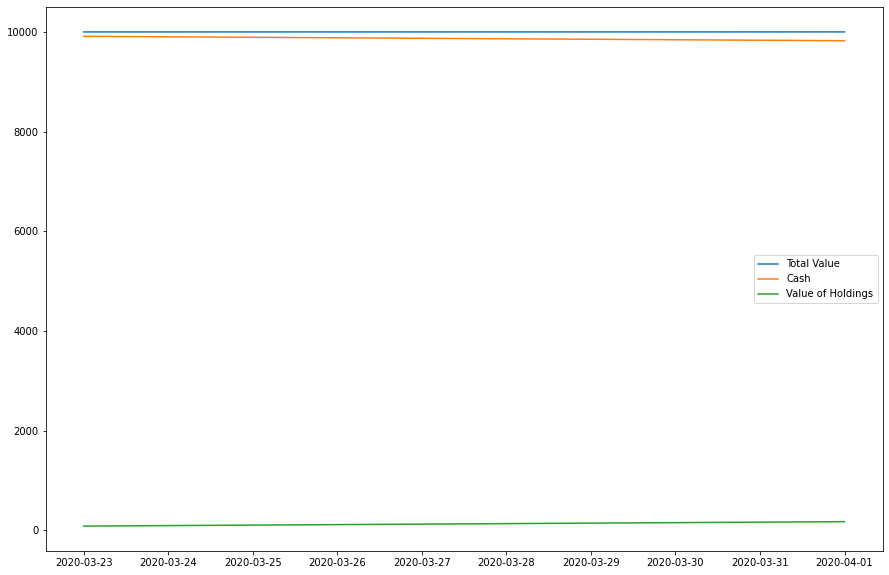

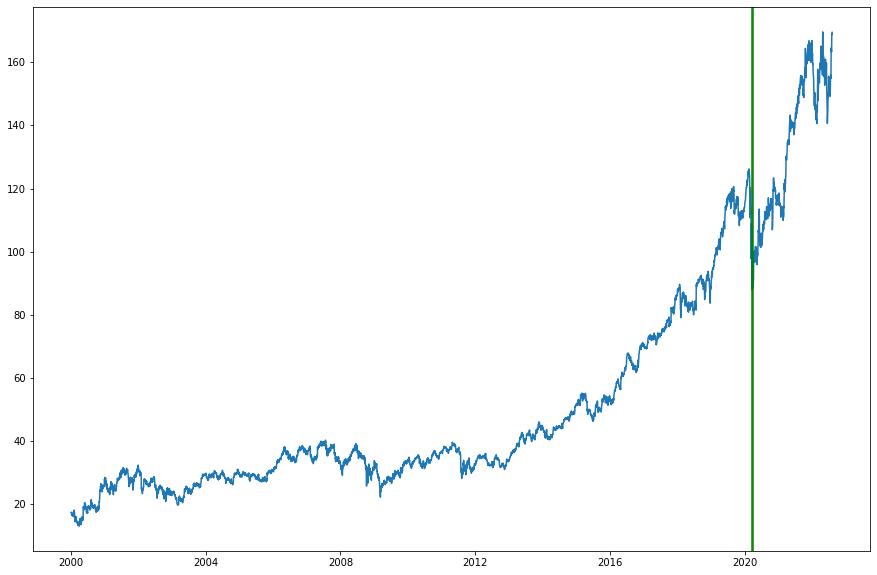

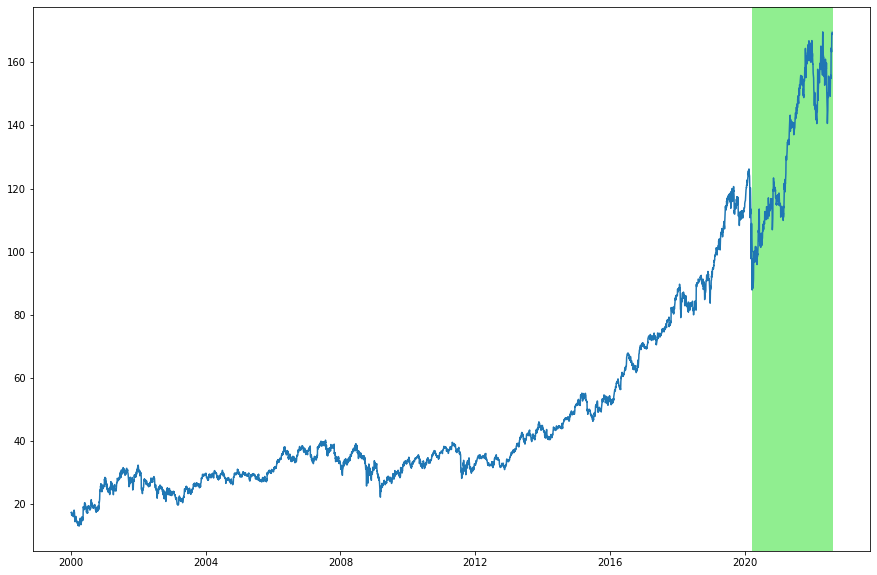

Ticker: MAS
Error downloading daily candlesticks for MAS:
HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/MAS/history?period1=946728000&period2=1686135599&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f3e18b21510>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
feature importance:
kama240: 0.05917027746425029
pchange_-1920day: 0.04236452866726673
pchange_-4day: 0.041201526725651964
percent_price_osc: 0.03700312954179993
avg_true_range: 0.03586820601995014
aroon_up: 0.032391754909292636
donchian40_wband: 0.029729545638011192
donchian40_pband: 0.027974815556599156
pchange_-240day: 0.027965036657825713
pchange_-2day: 0.027268088401698306
macd_diff: 0.026570163561617708
ema14: 0.025569484311146917
adx30: 0.025151629847985205
avg_true_range120: 0.024567814554996195
kst: 0.02409171230566324
pchange_-960day: 0.023774893141837207
adx

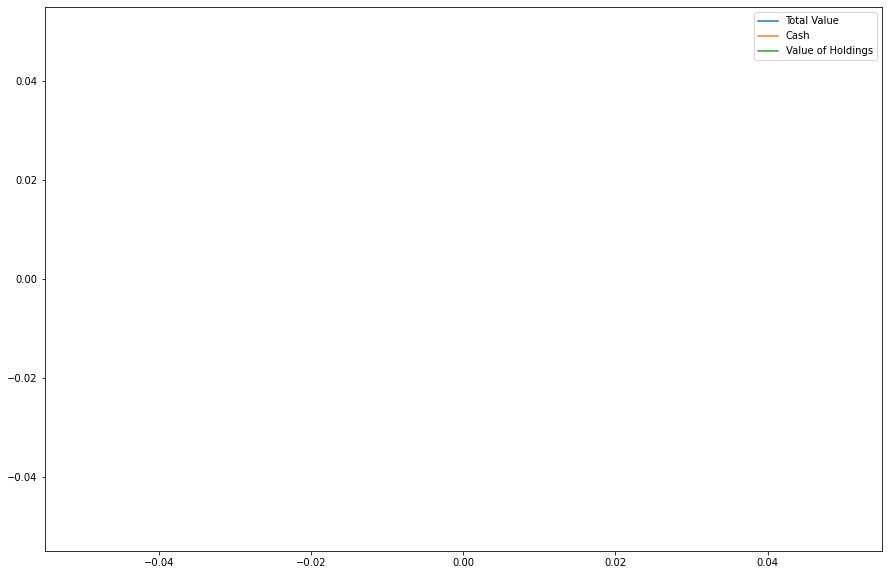

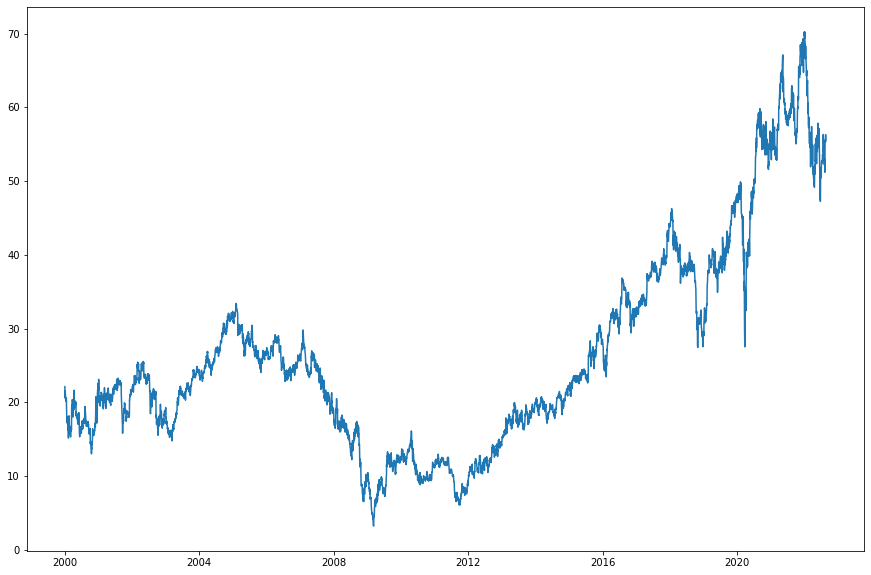

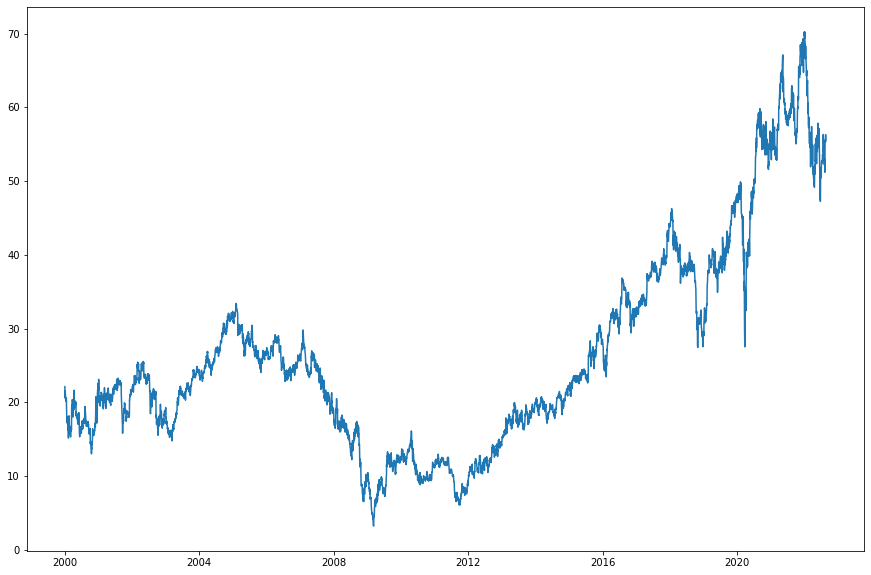

Ticker: UAA
feature importance:
aroon_up: 0.07688168161948257
donchian40_pband: 0.037687798200511255
avg_true_range120: 0.03661101709153548
macd_diff: 0.035563175566701834
pchange_-240day: 0.030049308793293747
avg_true_range: 0.029996225629085983
pchange_-1920day: 0.02756134872482006
kst: 0.027468949967928882
percent_price_osc: 0.026280996992389883
pchange_-2day: 0.025812285269936806
ema120: 0.025502014202350667
ema14: 0.024443003820641938
kama240: 0.024207544463181026
pchange_-30day: 0.024138586015356497
ulcer80: 0.023362719392281166
adx_neg: 0.022306684004398197
pchange_-960day: 0.021377639666351863
ema30: 0.02121929275161522
pchange_-4day: 0.020629396375390244
ulcer14: 0.0198258121611399
aroon_down: 0.019502448387231777
adx_pos: 0.017117431777232132
donchian40_wband: 0.016653960129508656
ulcer40: 0.016400870657262
pchange_-480day: 0.014899527787835739
pchange_-120day: 0.01316044445639444
adx_neg30: 0.012961105906318155
kama60: 0.012682489674769107
ulcer120: 0.011960369846906911
rsi1

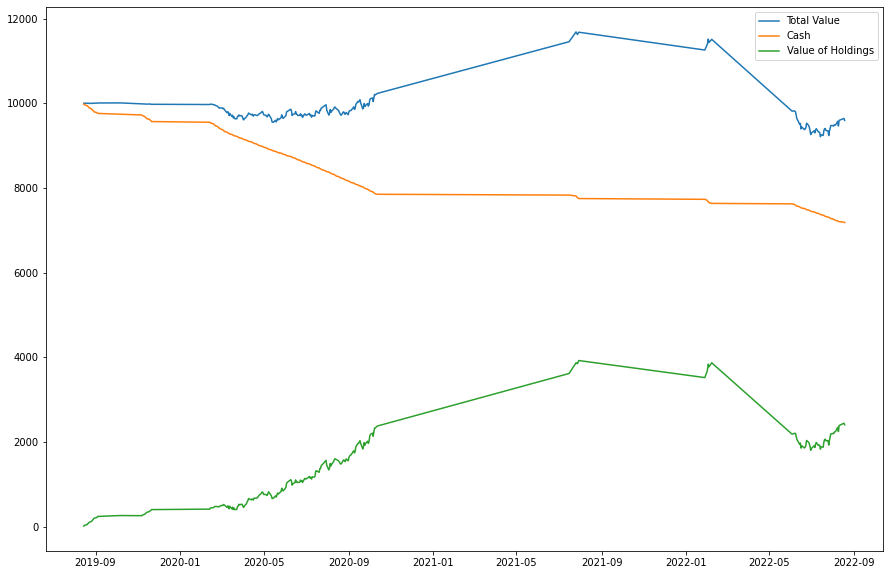

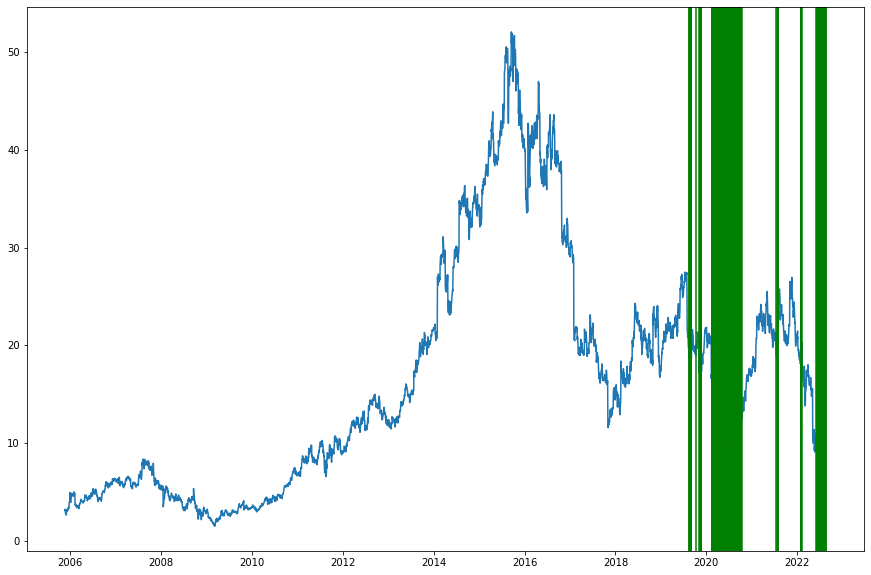

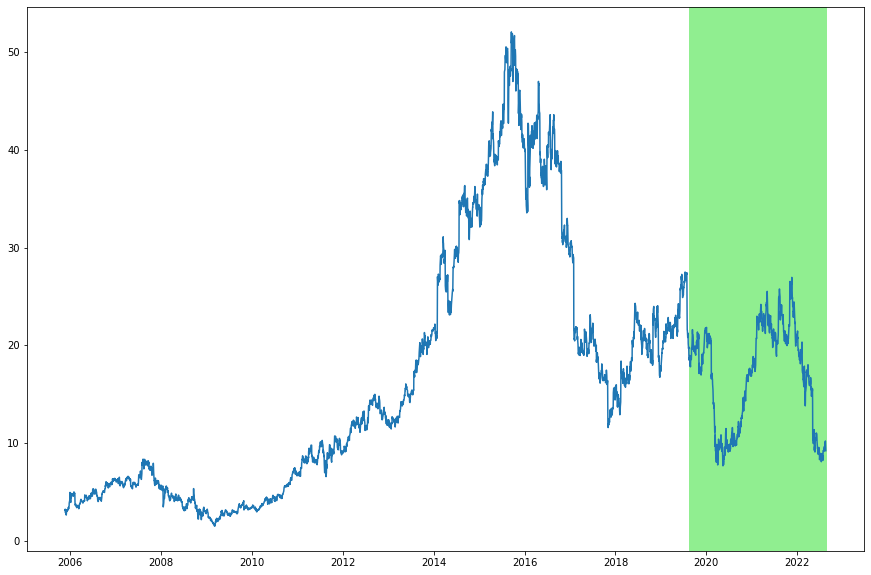

{'average_gainloss': -134.7548826535543, 'results': {'WM': {'cash': 9823.699996948242, 'assets': 2, 'latest_price': 88.43000030517578, 'total_value': 10000.559997558594, 'roi': 0.003176389954056592}, 'MAS': None, 'UAA': {'cash': 7184.45529794693, 'assets': 247, 'latest_price': 9.760000228881836, 'total_value': 9595.175354480743, 'roi': -0.1437819989943907}}}
========== TESTING MODEL: SGD ===========


Ticker: WM
0 buy/sells performed - 0.0% of the time
Stock price change: 116.35845598174551%
Total gain/loss: 0%
ROI: 0%
None


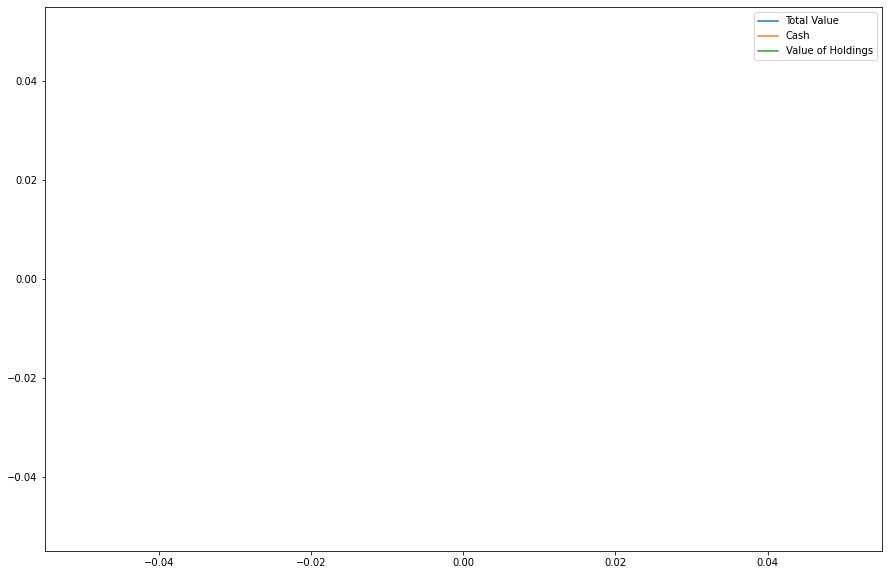

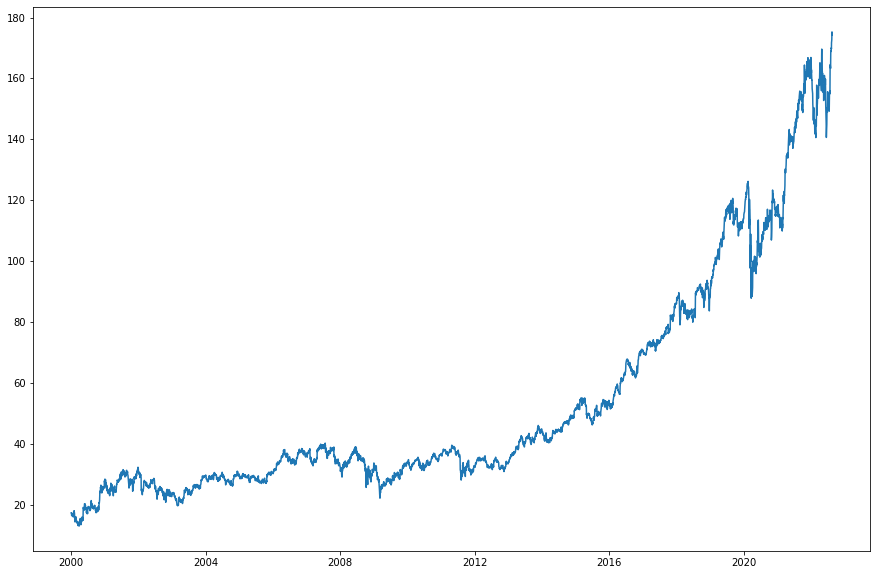

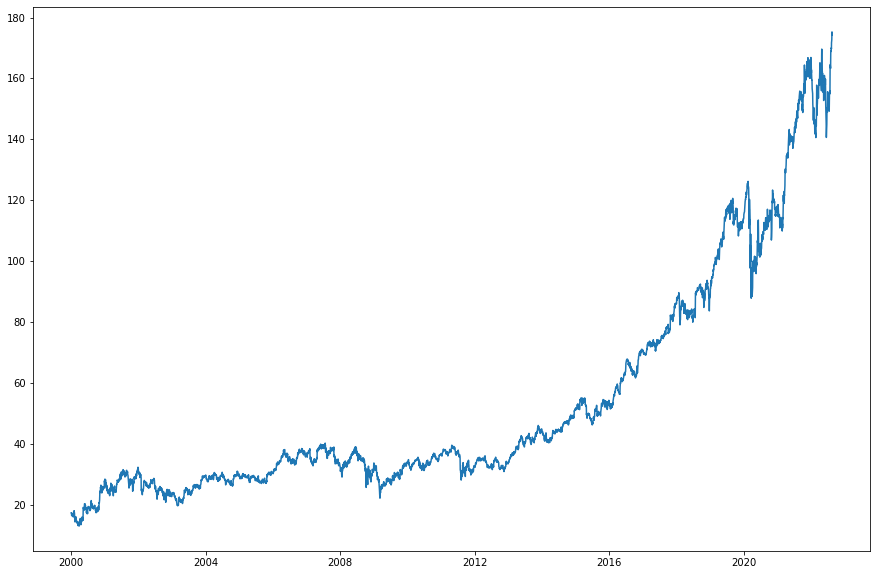

Ticker: MAS
20 buy/sells performed - 0.35118525021949076% of the time
Stock price change: 28.432287662152284%
Total gain/loss: 0.0%
ROI: nan%
{'cash': 10000, 'assets': 0, 'latest_price': 48.380001068115234, 'total_value': 10000.0, 'roi': nan}


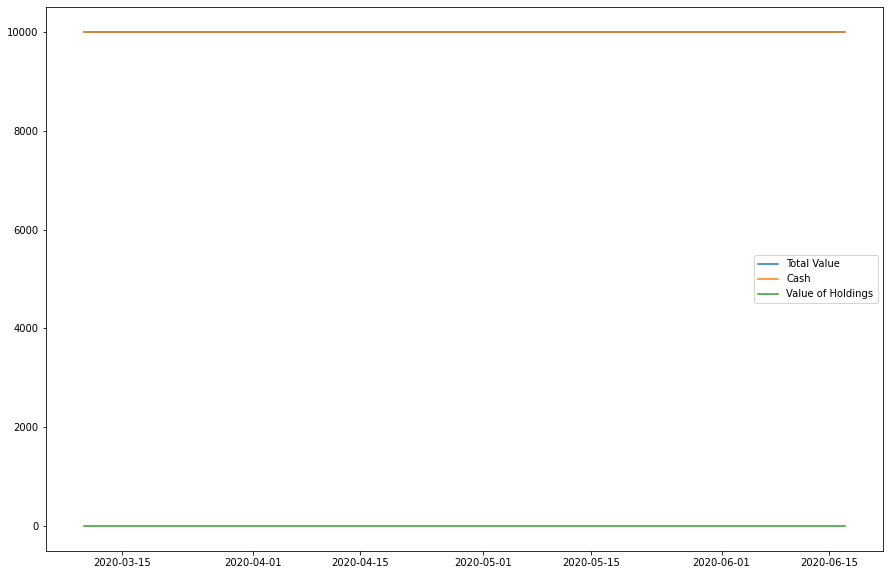

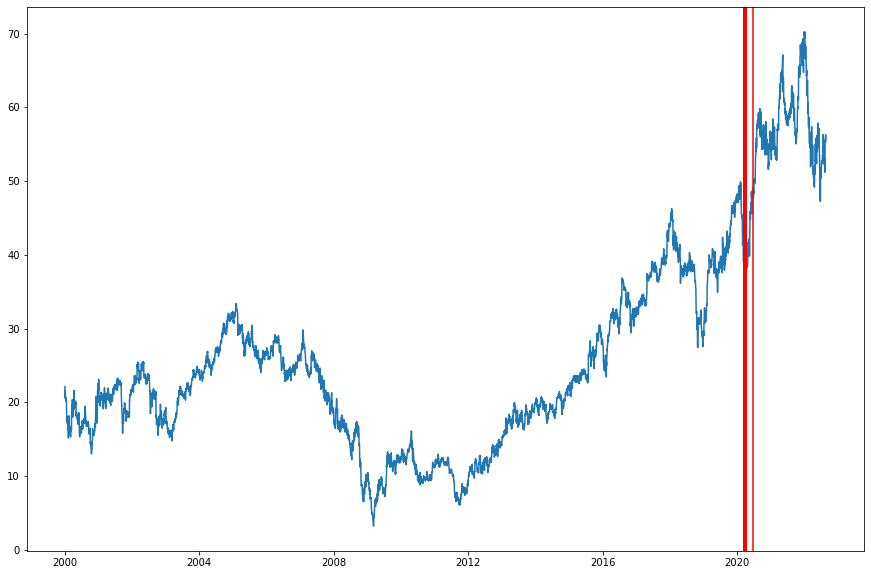

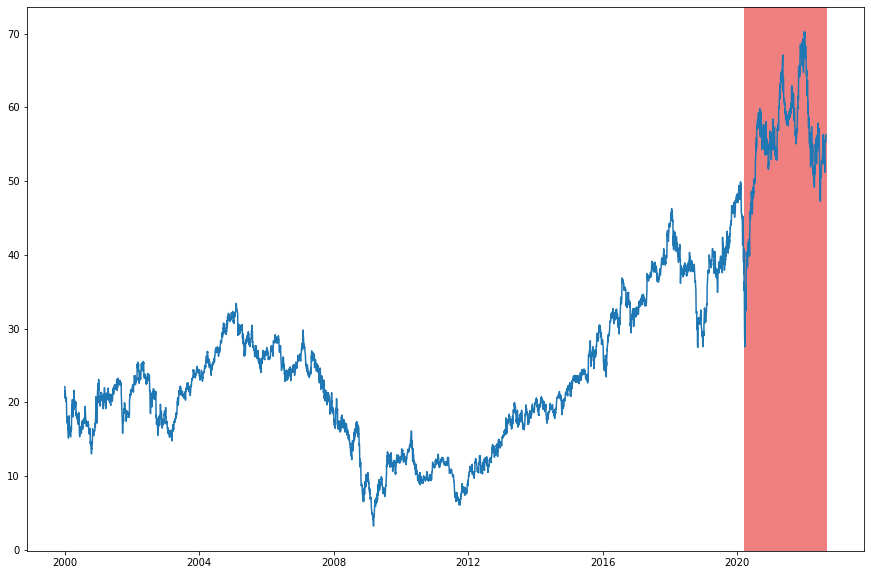

Ticker: UAA
162 buy/sells performed - 3.842504743833017% of the time
Stock price change: -57.56880585447559%
Total gain/loss: -5.3663993024826055%
ROI: -27.99548897243365%
{'cash': 8083.119995594025, 'assets': 162, 'latest_price': 8.520000457763672, 'total_value': 9463.36006975174, 'roi': -0.2799548897243365}


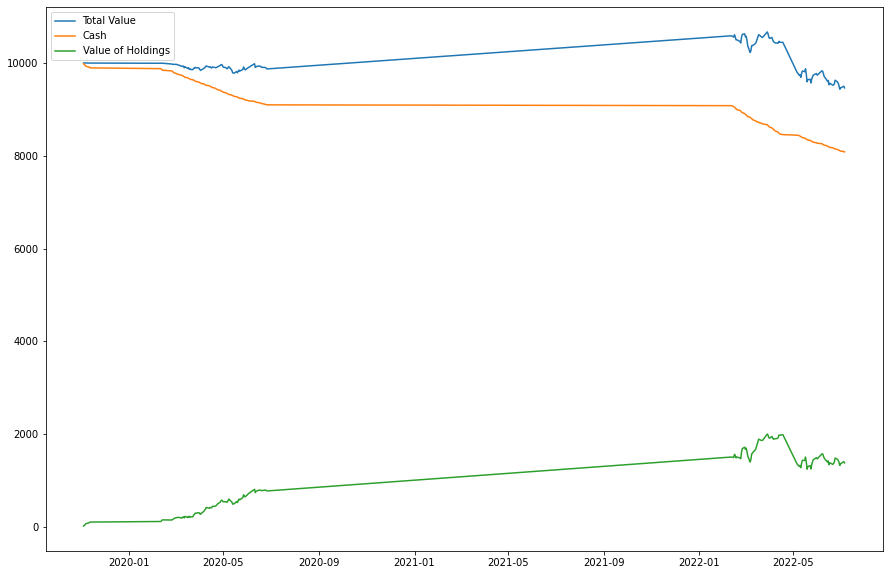

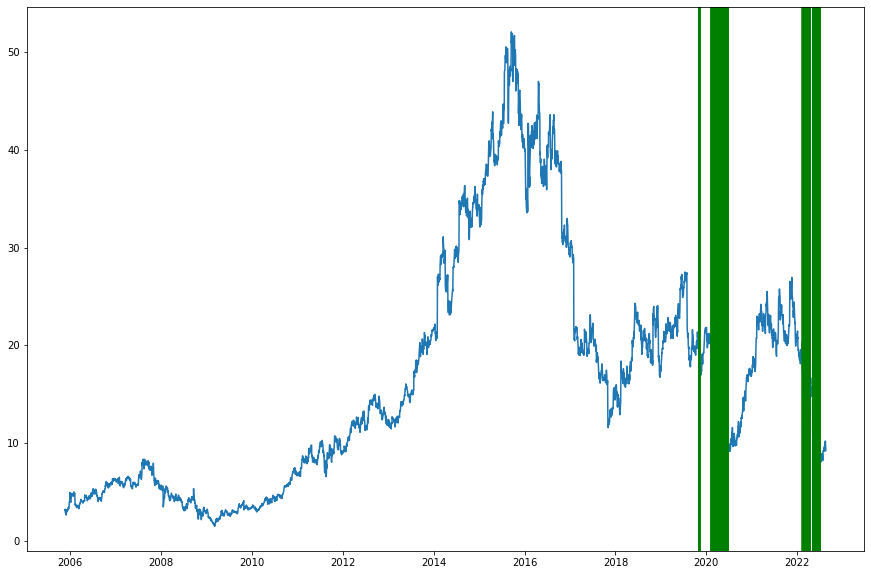

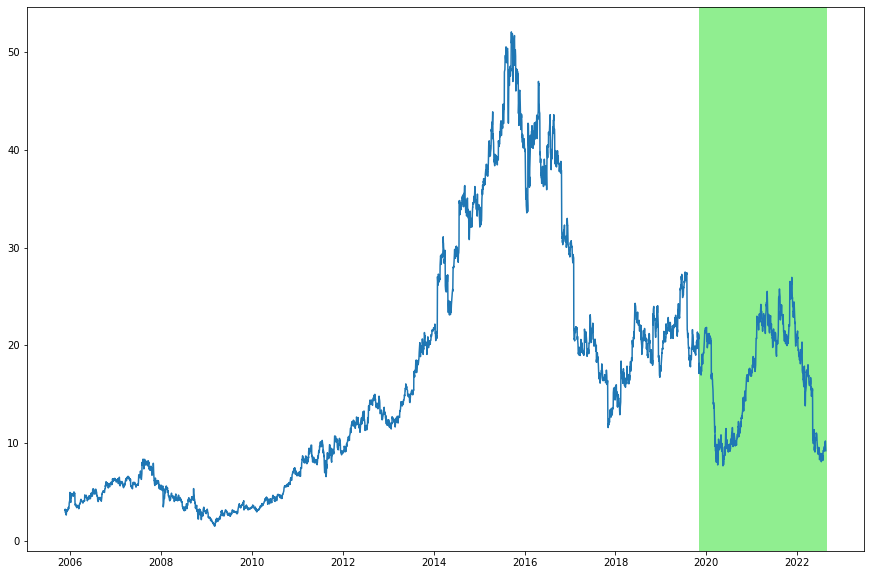

{'average_gainloss': -178.87997674942017, 'results': {'WM': None, 'MAS': {'cash': 10000, 'assets': 0, 'latest_price': 48.380001068115234, 'total_value': 10000.0, 'roi': nan}, 'UAA': {'cash': 8083.119995594025, 'assets': 162, 'latest_price': 8.520000457763672, 'total_value': 9463.36006975174, 'roi': -0.2799548897243365}}}


In [14]:
spy_constituents = list(pd.read_csv('../../data/spy_constituents.csv', header=0)['Symbol'])
random.shuffle(spy_constituents)

#ds.download_financials_reported(spy_constituents)

tickers = spy_constituents[:3]
ticker = tickers[0]


strategies = [
    #('Grid search SVR', TechnicalIndicatorsModelStrategy(svr_grid, window=7, cutoff=0.5, bias=0.1)),
    #('MLP', TechnicalIndicatorsModelStrategy(MLPRegressor(), window=14, cutoff=2, bias=0.1)),
    #('MLP', SignalsModelStrategy(MLPRegressor(), lambda df: SignalSet.concat(TechnicalSignalSet(df, predict_window=7), FinancialsReportedSignalSet.from_datastore(df["date"], ticker)), cutoff=0.5))
    #('MLP', SignalModelStrategy(MLPRegressor(), lambda df: TechnicalSignalSet(df, predict_window=14), cutoff=2.5, bias=0.2)),
    ('SVR', SignalModelStrategy(SVR(), lambda df: TechnicalSignalSet(df, predict_window=14), cutoff=1.2, bias=0.1)),
    ('Random Forest', SignalModelStrategy(RandomForestRegressor(n_jobs=-1, criterion='absolute_error'), lambda df: TechnicalSignalSet(df, predict_window=14), cutoff=1.2, bias=0.35)),
    ('SGD', SignalModelStrategy(SGDRegressor(), lambda df: TechnicalSignalSet(df, predict_window=14), cutoff=1.5, bias=0.2)),
    #('SVR', TechnicalIndicatorsModelStrategy(SVR(), window=14, cutoff=2, bias=0.1)),
]

#def grid_search(name, strategy):
    

for name, strategy in strategies:
    print(f"========== TESTING MODEL: {name} ===========\n\n")
    bt_summary = bt.comprehensive_backtest(strategy, tickers, "2000-01-01", "2023-06-06", plot=True, train_test_ratio=0.8, processes=8)
    print(bt_summary)
#strategy = DummyStrategy()
#dummy_summary = bt.comprehensive_backtest(strategy, tickers, plot=True, skip_index=252*15, processes=8)
#print(dummy_summary)

In [8]:
from financials_reported_signals import FinancialsReportedSignalSet

financials_signals = FinancialsReportedSignalSet(date, reports)

NameError: name 'date' is not defined